# Visualization with Matplotlib
Matplotlib is a plotting library modeled after Matlab's plotting capabilities. Matplot works with basic Python objects as well as Numpy arrays, and is integrated into Pandas for quick DataFrame plotting.<br>
Plot types include line plots, scatter plots, image plots, contour plots, histograms and others. Matplotlib also allows for a wide variety of styling options. While Matplotlib was originally designed only for 2-dimensional plots, an add-on toolkit, `mpl_toolkits`, is available for some basic 3-d plotting.

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('classic')

### Pyplot
The `Pyplot` module gives us an easy interface for Matplotlib plotting, including convenience methods and render handling. You can think of `Pyplot` as a canvas which gives you access to plotting operations supported by `Matplotlib`. All plotting will be done on the canvas and calling `Pyplot`'s `show()` function will render the canvas.

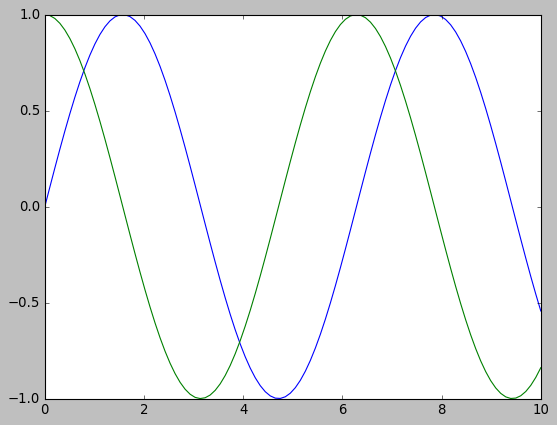

In [2]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()


*Note that both plots were created on the same axes*

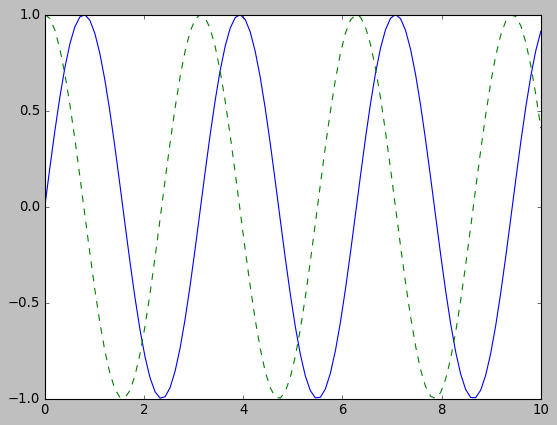

In [3]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(2*x), '-')
plt.plot(x, np.cos(2*x), '--')

*Jupyter's environment does not require a call to the `show()` function. This is done implicitly.*

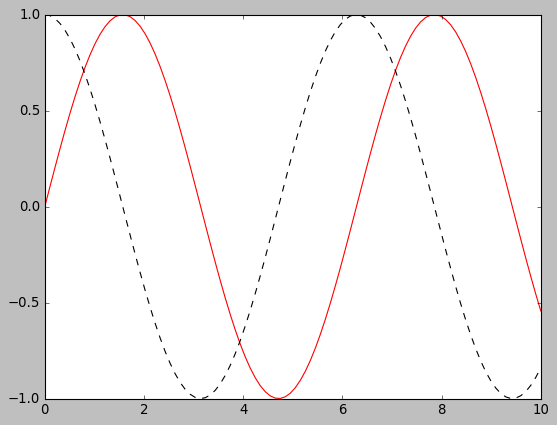

In [4]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'k--')
plt.savefig('sinus.png')

*We can call the `savefig()` to save the plot to an image file.*

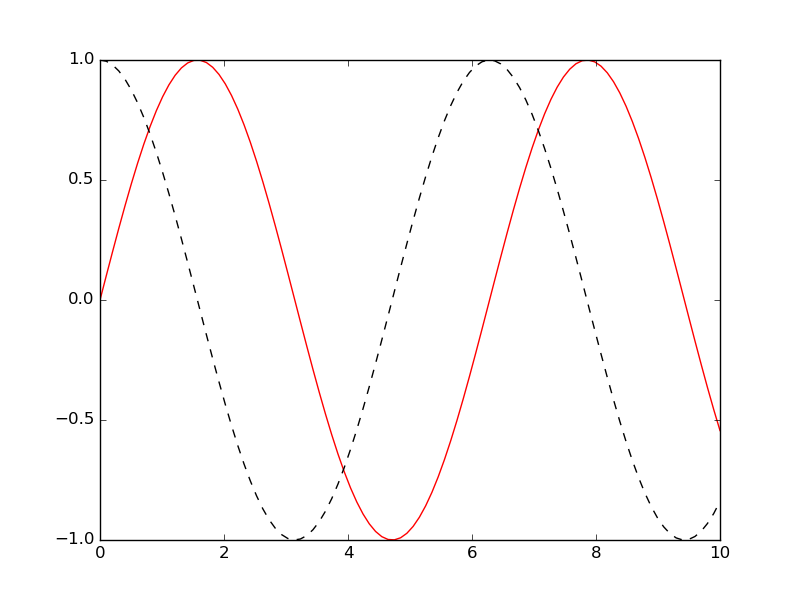

In [5]:
from IPython.display import Image
Image('sinus.png')

## Separate plots
In order to display plot separately, we must create a figure on the canvas with multiple plot axes. This can be done using 2 methods as follows. The first is a **stateful** interface, where we set the state of `Pyplot` to reference the axes we will be plotting on before each plot. The second is an **object oriented** interface, where we call plotting functions for each axes object.

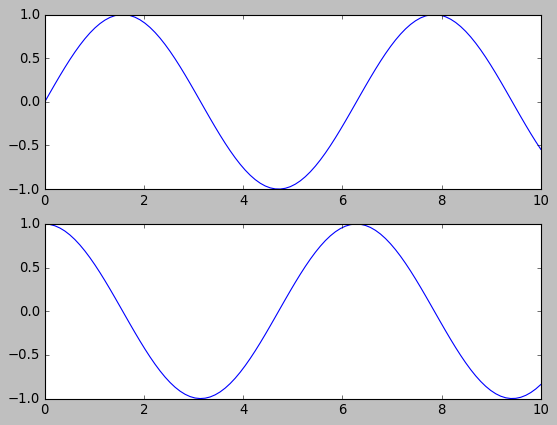

In [6]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

plt.show()

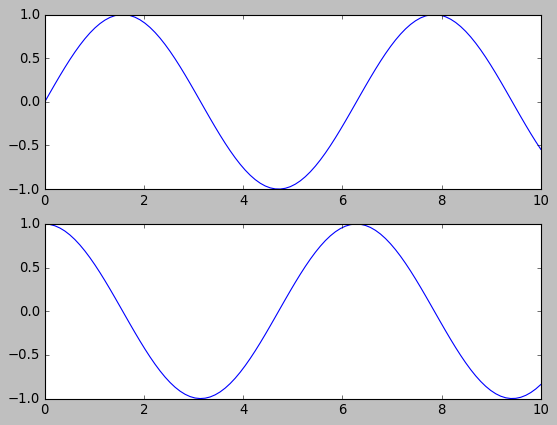

In [7]:
# First create a grid of plots
# ax will be an array of two Axes objects, fig will be the figure object
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
plt.show()

## Plot Color and Styles

In [8]:
plt.style.use('seaborn-whitegrid')

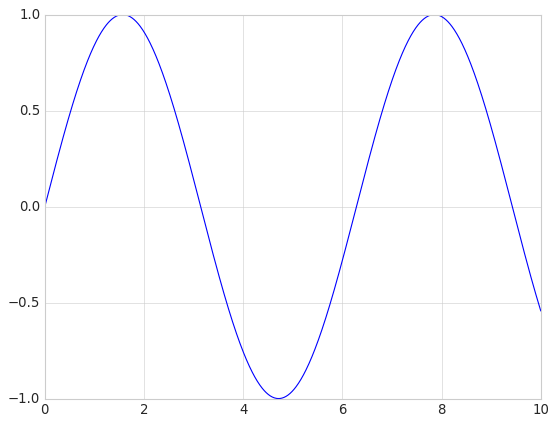

In [9]:
x = np.linspace(0, 10, 1000)
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x))
plt.show()

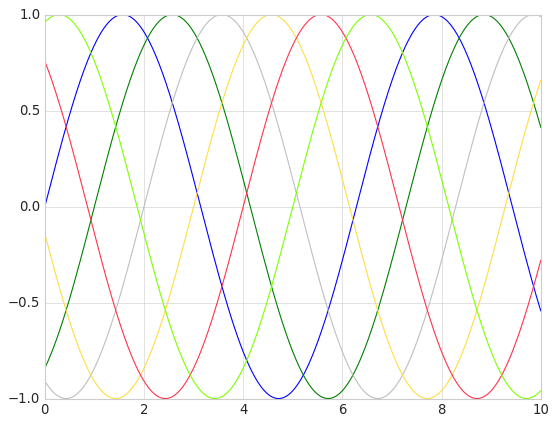

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported
plt.show()

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

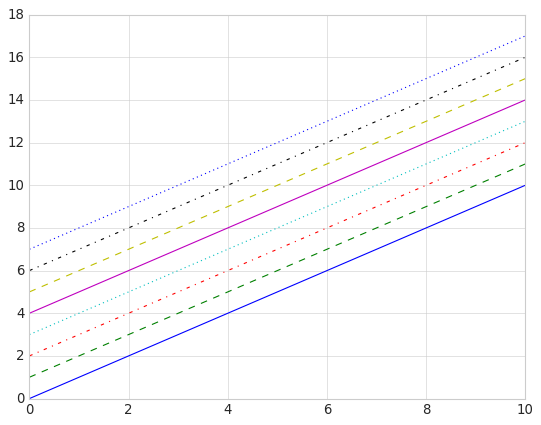

In [11]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted
plt.show()

##### Shorthand Styling
All line styles but only basic colors are supported in this method (rgbcmykw)

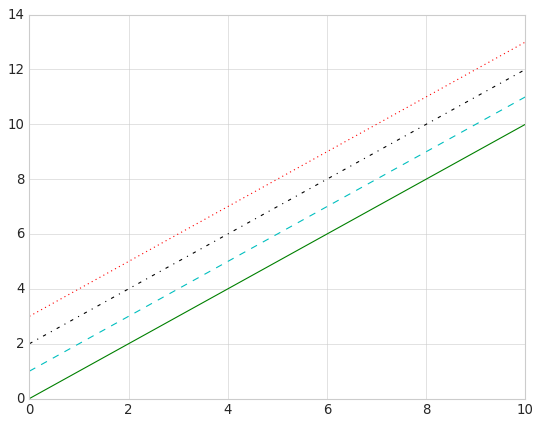

In [12]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red
plt.show()

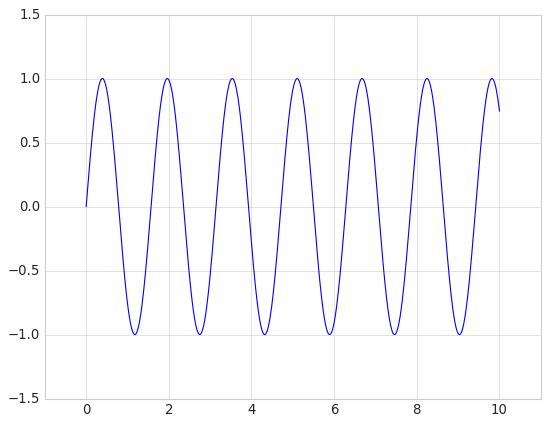

In [13]:
plt.plot(x, np.sin(4*x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

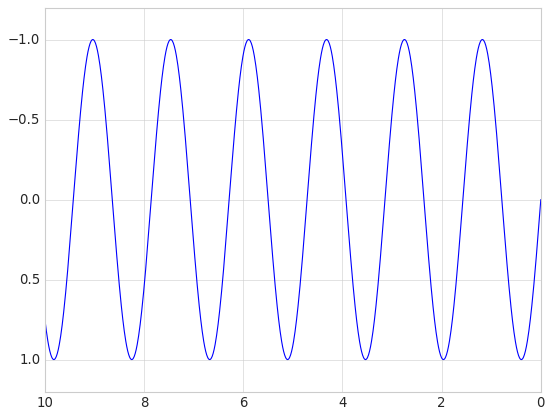

In [14]:
plt.plot(x, np.sin(4*x))

plt.xlim(10, 0) # reverse axes
plt.ylim(1.2, -1.2); # reverse axes

*You can also reverse the axes order.*

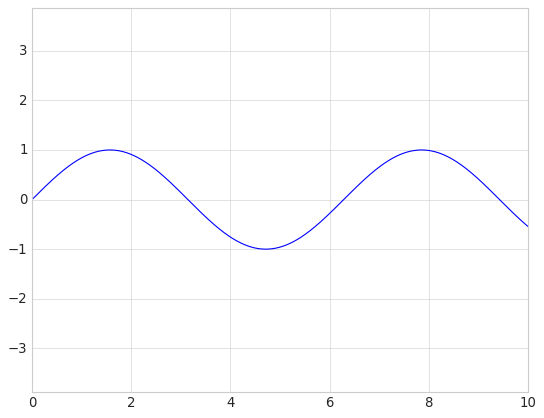

In [15]:
plt.plot(x, np.sin(x))
plt.axis('equal')
plt.show()


##### You can set the axes for each subplot

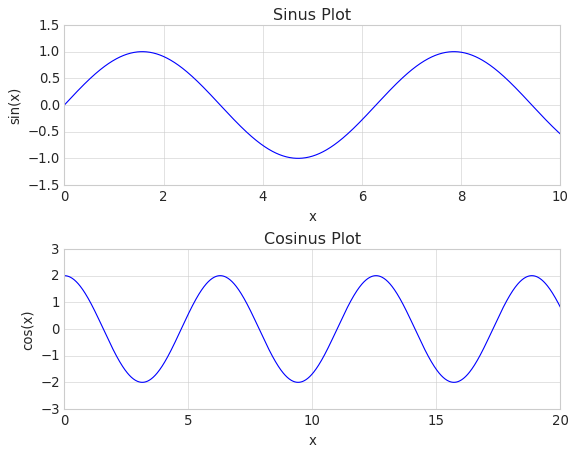

In [16]:

fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.4)
ax[0].plot(x, np.sin(x))
ax[1].plot(2*x, 2*np.cos(2*x))
ax[0].set(xlim=(0, 10), ylim=(-1.5, 1.5),
       xlabel='x', ylabel='sin(x)',
       title='Sinus Plot');
ax[1].set(xlim=(0, 20), ylim=(-3, 3),
       xlabel='x', ylabel='cos(x)',
       title='Cosinus Plot');
plt.show()

### Labeling

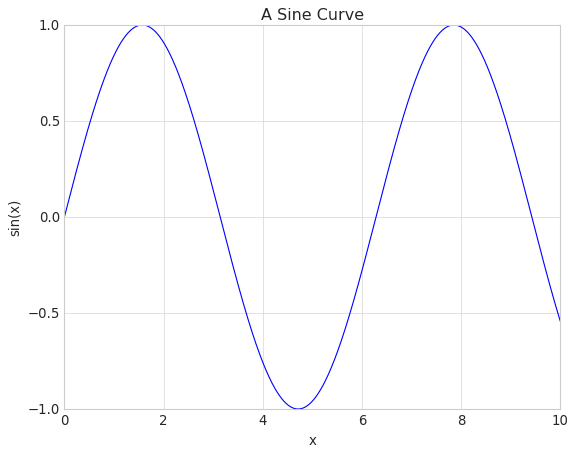

In [17]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

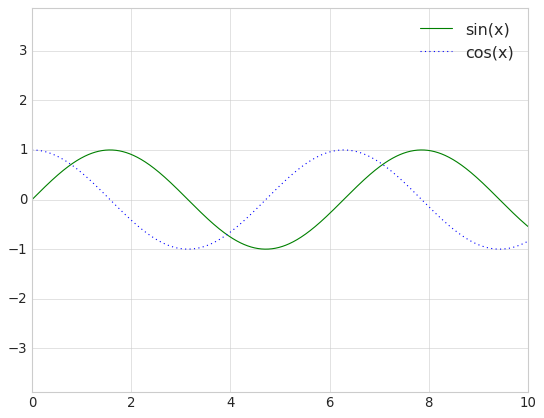

In [18]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()
plt.show()

## Scatter Plots
For the basic functionalities of `Matplotlib` we experimented with line plots. This is just one of many plot types offered by `Matplotlib`. We will now discuss the scatter plot, which is most useful when dealing with sampled data.

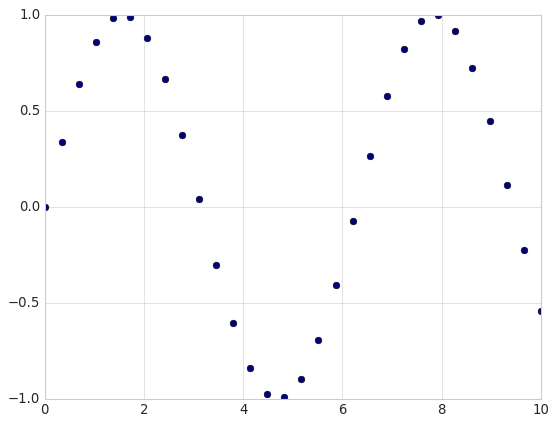

In [19]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='navy')

*Using a dot-style instead of a line style in the `plot` method gives us a simple scatter plot.*

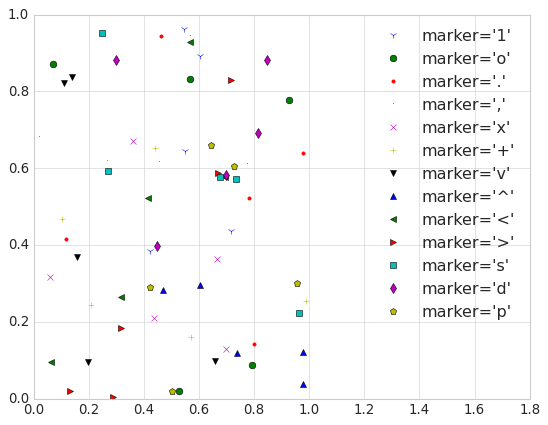

In [20]:
rng = np.random.RandomState(0)
for marker in ['1','o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd','p']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

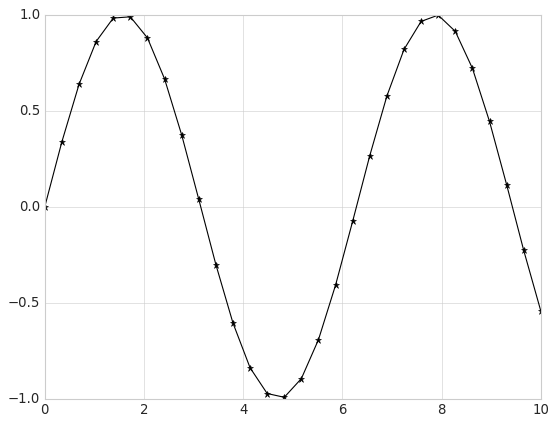

In [21]:
plt.plot(x, y, '-*k');

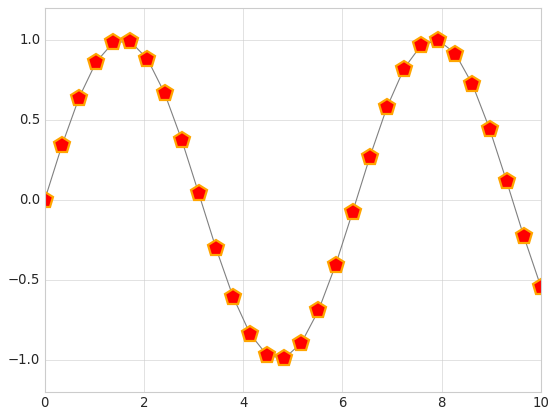

In [22]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=1,
         markerfacecolor='red',
         markeredgecolor='orange',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### A more powerful scatter plot tool - `plt.scatter` 
The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.<br>
*Note: this functionality comes at the cost of efficiency - scatter plots with many data points using this method may be computationally intensive and reduce performance.*

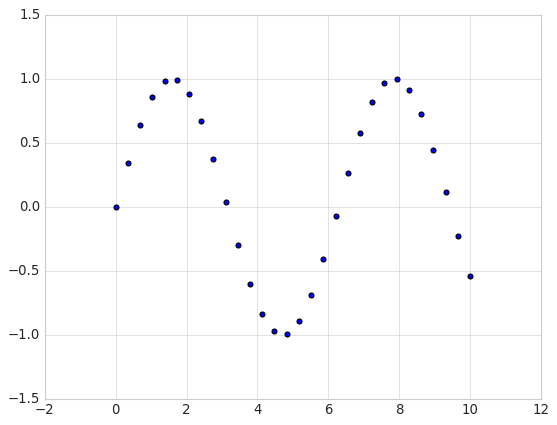

In [23]:
plt.scatter(x, y, marker='o');

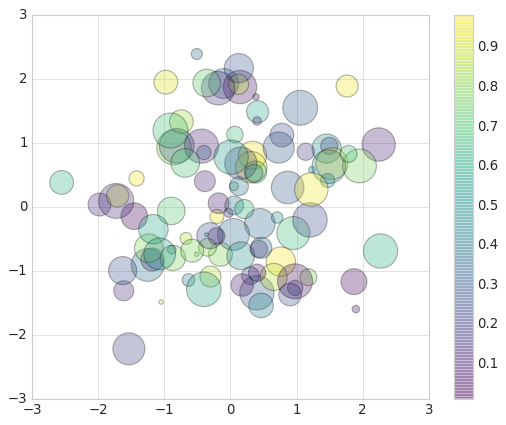

In [24]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### Example - Diamonds

In [25]:
df = pd.read_csv('diamonds.csv')
print(df.head())

   #  carat      cut color clarity  depth  table  price     x     y     z
0  1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1  2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2  3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3  4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4  5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


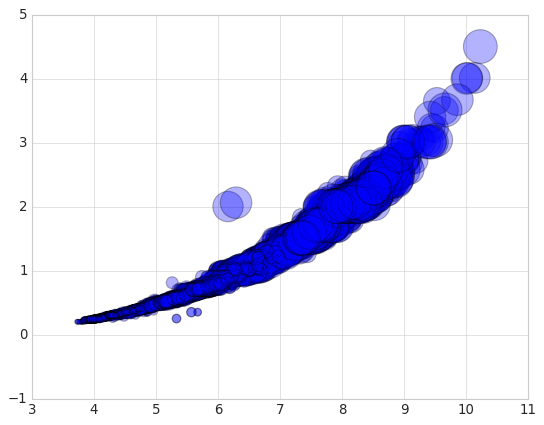

In [26]:
diamonds = df.loc[((df.y-df.x).abs()<0.1) & (df.x>1) ]
plt.scatter(diamonds.x, diamonds.carat, s=diamonds.price/20, alpha=0.3,
            cmap='jet')

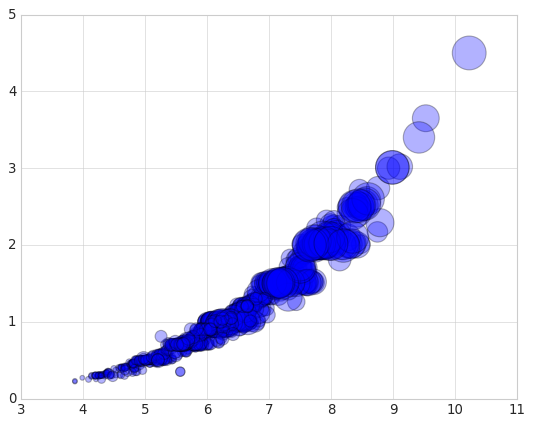

In [27]:
diamonds = df.loc[((df.y-df.x).abs()<0.1) & (df.x>1) & (df.cut=="Fair")]
plt.scatter(diamonds.x, diamonds.carat, s=diamonds.price/20, alpha=0.3,
            cmap='jet')

In [28]:
sorted_color=sorted(df.color.unique())
sorted_color

['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [29]:
color_cat = pd.Categorical(diamonds.color,
  ordered=True,
  categories=sorted_color
)
color_cat.codes

array([1, 2, 2, ..., 5, 3, 0], dtype=int8)

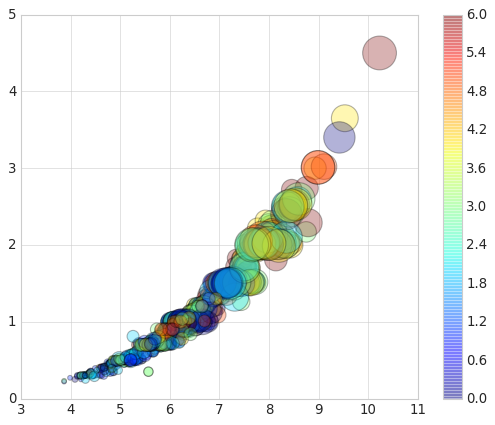

In [30]:
plt.scatter(diamonds.x, diamonds.carat, c=color_cat.codes,s=diamonds.price/20, alpha=0.3,
            cmap='jet')
plt.colorbar()
plt.show()

In [31]:
print(df.clarity.unique())
sorted_clarity = ['I1','SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF']

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [32]:
clarity_cat = pd.Categorical(diamonds.clarity,
  ordered=True,
  categories=sorted_clarity
)
clarity_cat.codes

array([4, 4, 4, ..., 1, 1, 3], dtype=int8)

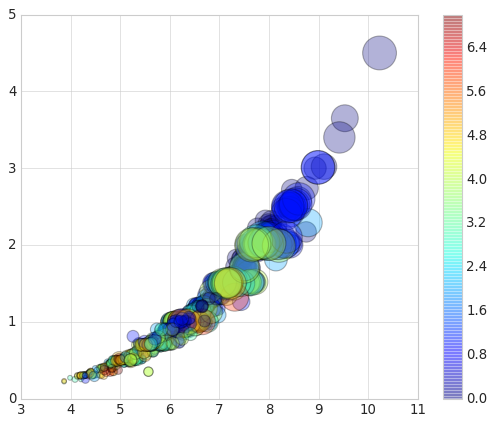

In [33]:
plt.scatter(diamonds.x, diamonds.carat, c=clarity_cat.codes,s=diamonds.price/20, alpha=0.3,
            cmap='jet')
plt.colorbar()
plt.show()

### Example - Population

In [34]:
cities = pd.read_csv('california_cities.csv')
cities.head()

Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

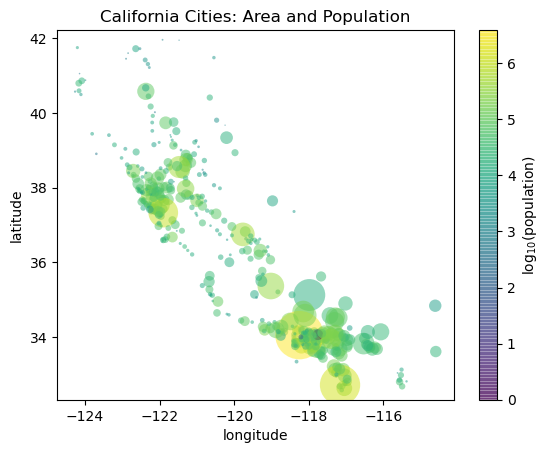

In [81]:

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_land_km2'].values

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')


plt.title('California Cities: Area and Population');

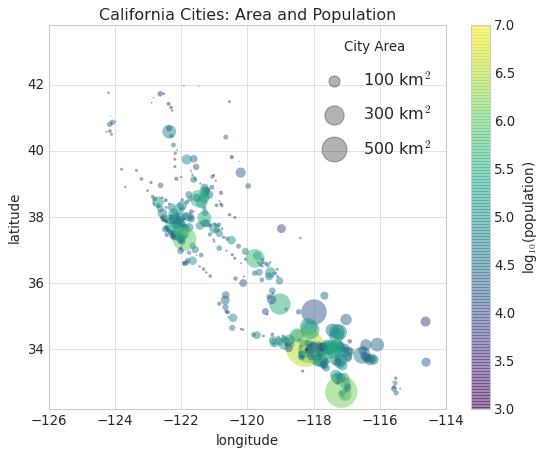

In [36]:
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) #limit color scale to create better variation
plt.title('California Cities: Area and Population');
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

*The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified. By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.*

### Contour Plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

In [37]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#### `contour`
Takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. 

In [38]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y) #create a 2-d matrix from each array 
Z = f(X, Y)

print(X, X.shape)
print(Z,Z.shape)

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]] (40, 50)
[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.8275558  -0.80744041 ...  0.93467448  0.77467433
   0.55894214]
 [-0.83907153 -0.820263   -0.79266951 ...  0.98503397  0.88847607
   0.73757604]
 ...
 [-0.83907153 -0.48696962 -0.02692065 ...  0.98525345  0.79584263
   0.46799565]
 [-0.83907153 -0.47558005 -0.00130271 ...  0.93488414  0.6993547
   0.37933079]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]] (40, 50)


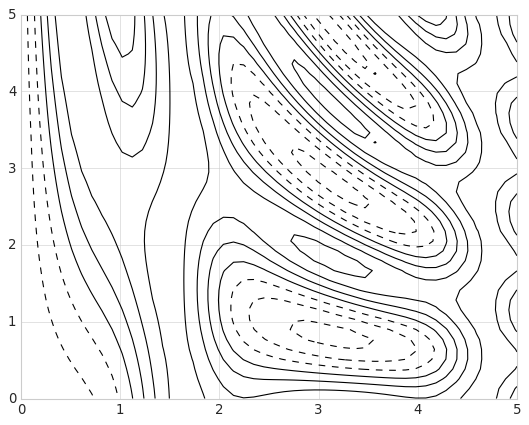

In [39]:
plt.contour(X, Y, Z, colors='black');

*When a single color is used, dashed lines represent negative values.*

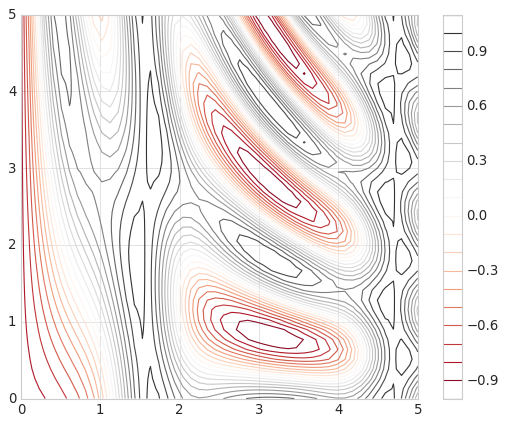

In [40]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

#### `contourf`
Fills the white spaces for better visualization.

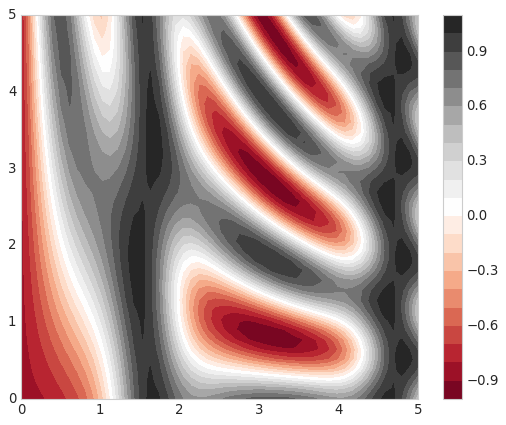

In [41]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

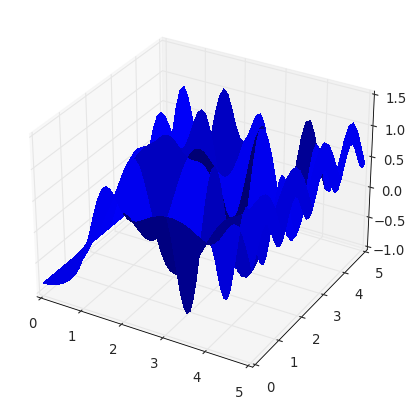

In [42]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

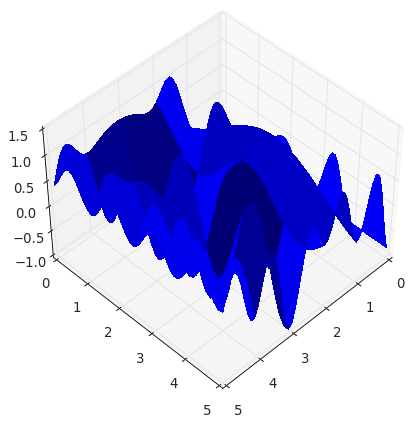

In [43]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(45, 45)
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

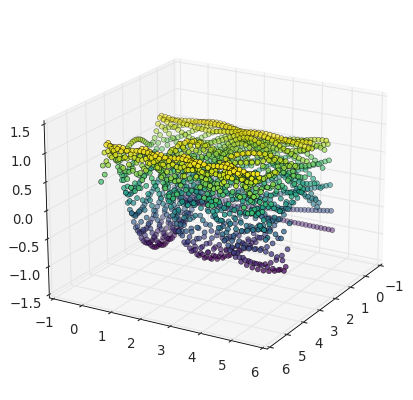

In [44]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5)
ax.view_init(20, 30)
plt.show()

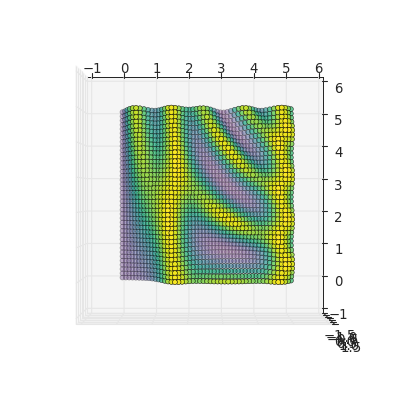

In [45]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5)
ax.view_init(90, 270)
plt.show()

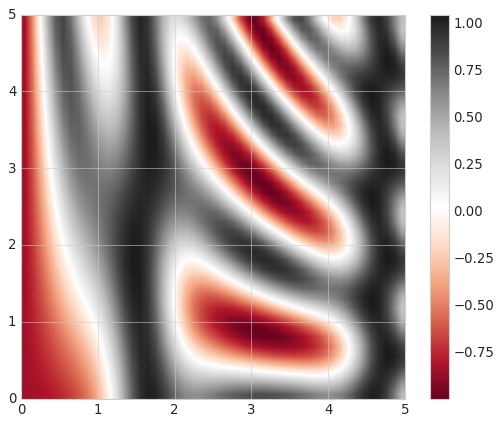

In [46]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy',aspect=1)
plt.colorbar()
plt.show()

#### Example - wildfires

In [47]:
fires1 = pd.read_csv('fire_archive_M6_101673.csv')
fires2 = pd.read_csv('fire_nrt_M6_101673.csv')
fires = pd.concat([fires1,fires2])
fires.latitude = fires.latitude.round(0)
fires.longitude = fires.longitude.round(0)
fires.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0     -12.0      142.0       311.4   4.2    1.9  2019-09-01        14   
1     -12.0      142.0       310.2   4.2    1.9  2019-09-01        14   
2     -12.0      142.0       310.1   4.2    1.9  2019-09-01        14   
3     -13.0      143.0       310.4   3.8    1.8  2019-09-01        14   
4     -13.0      143.0       314.3   3.6    1.8  2019-09-01        14   

  satellite instrument  confidence version  bright_t31   frp daynight  type  
0     Terra      MODIS          23     6.3       297.0  40.2        D   0.0  
1     Terra      MODIS          18     6.3       296.9  33.5        D   0.0  
2     Terra      MODIS          27     6.3       296.7  36.0        D   0.0  
3     Terra      MODIS          35     6.3       298.1  28.2        D   0.0  
4     Terra      MODIS          56     6.3       299.4  43.5        D   0.0

In [48]:
m=fires.groupby(['latitude','longitude']).mean()
m.head()


brightness      scan     track    acq_time  confidence  \
latitude longitude                                                           
-43.0    146.0      342.757692  1.057692  1.026923  512.461538   77.500000   
         147.0      325.175000  1.150000  1.058333  352.583333   74.333333   
         148.0      333.390000  1.760000  1.260000  756.400000   55.400000   
-42.0    146.0      306.366667  1.100000  1.033333  415.000000   45.000000   
         147.0      320.250000  1.061111  1.027778  308.888889   62.611111   

                    bright_t31        frp  type  
latitude longitude                               
-43.0    146.0      290.988462  68.292308   0.0  
         147.0      297.850000  25.600000   0.0  
         148.0      290.420000  82.740000   0.0  
-42.0    146.0      287.266667   9.766667   0.0  
         147.0      293.144444  34.972222   0.0

In [49]:
bright=m.pivot_table(index='latitude',columns='longitude',values='brightness').T.values
X_unique = np.sort(fires.latitude.unique())
Y_unique = np.sort(fires.longitude.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

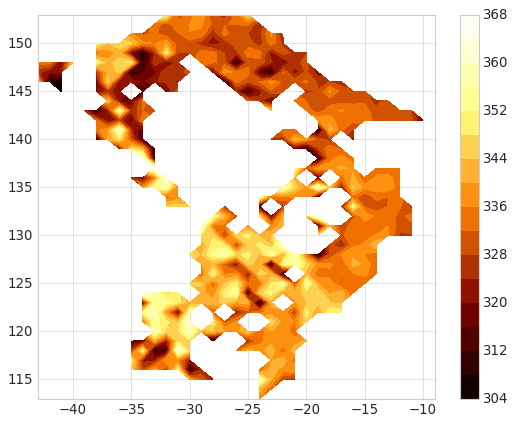

In [50]:

# Generate a contour plot
plt.contourf(X, Y, bright,levels=20, cmap=plt.cm.afmhot)
plt.colorbar()
plt.show()

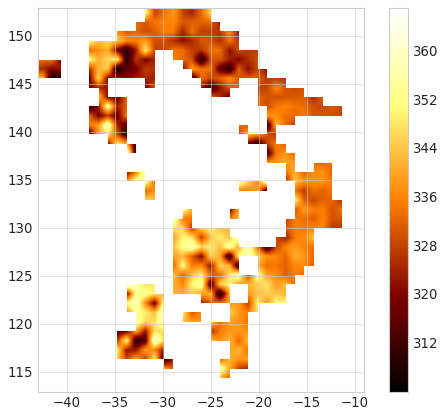

In [51]:
plt.imshow(bright, extent=[X_unique.min(),X_unique.max(),Y_unique.min(),Y_unique.max()], origin='lower',
           cmap=plt.cm.afmhot,aspect=1)
plt.colorbar()
plt.show()

### Histogtams

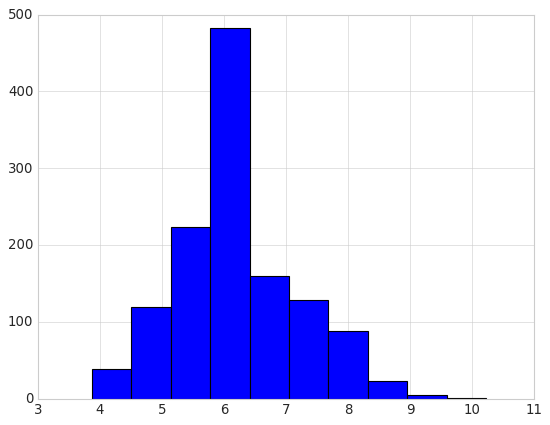

In [52]:
hist_data=diamonds.x
plt.hist(hist_data)
plt.show()

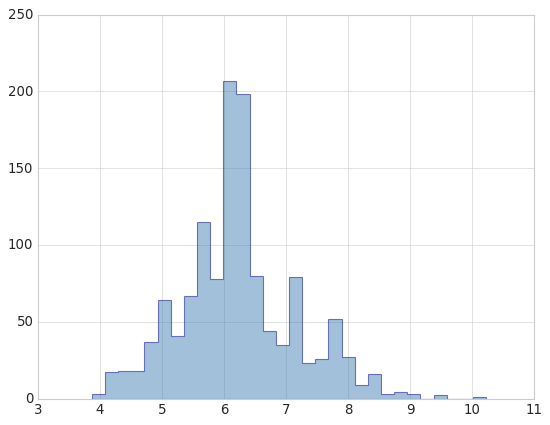

In [53]:
plt.hist(hist_data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='navy')
plt.show()

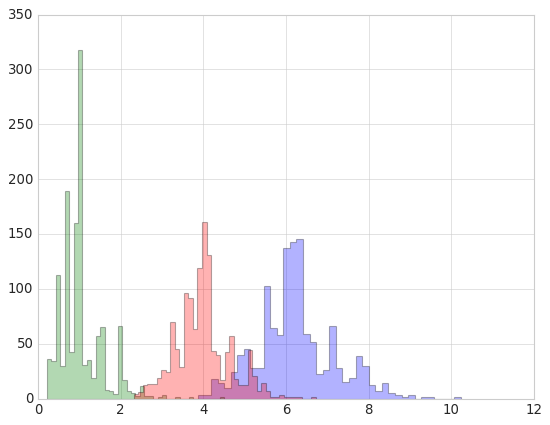

In [54]:

kwargs = dict(histtype='stepfilled', alpha=0.3,  bins=40) #density normalizes data

plt.hist(hist_data, **kwargs)
plt.hist(diamonds.carat, **kwargs)
plt.hist(diamonds.z, **kwargs)
plt.show()

### Subplots

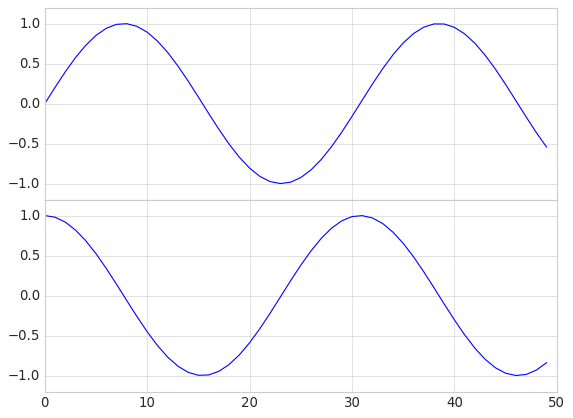

In [55]:
fig = plt.figure() # create figure 
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) #add axes object: left, bottom, width, height
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.show()

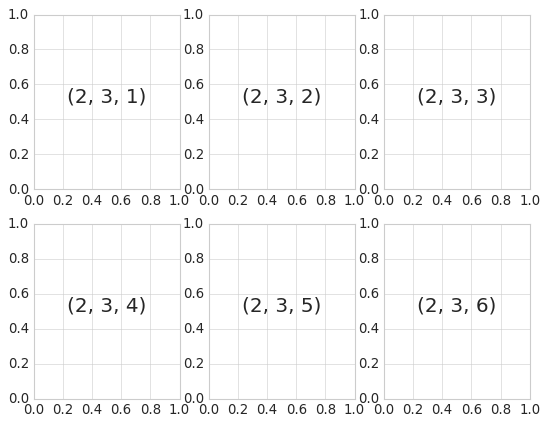

In [56]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.show()

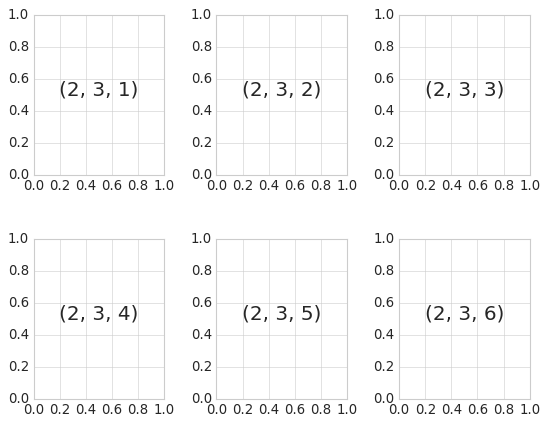

In [57]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
plt.show()

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


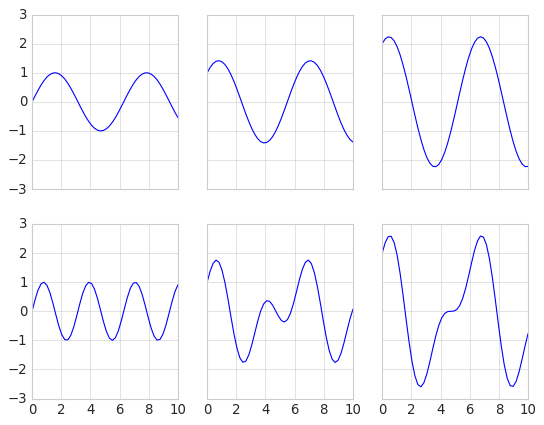

In [58]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for ind,axis in np.ndenumerate(ax):
    print(ind)
    axis.plot(x,np.sin((ind[0]+1)*x)+ind[1]*np.cos(x))
plt.show()

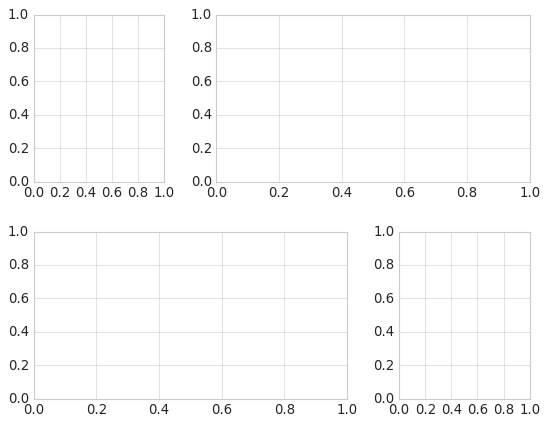

In [59]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) #convience method for creating grid coordinates recognized by subplot
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])
plt.show()

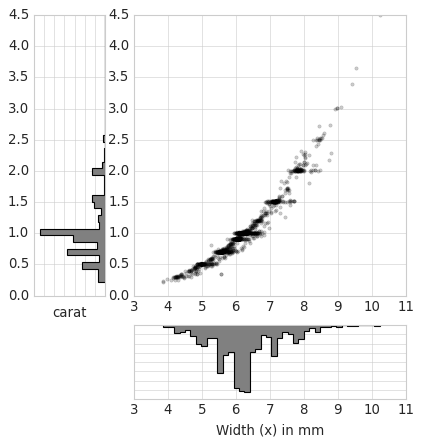

In [60]:

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(diamonds.x, diamonds.carat, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(diamonds.x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()
x_hist.set_xlabel("Width (x) in mm")

y_hist.hist(diamonds.carat, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()
y_hist.set_xlabel("carat")
plt.show()

#### Customizing Matplotlib: Configurations and Stylesheets

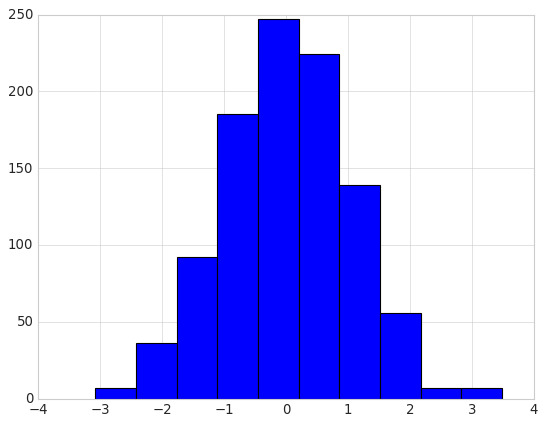

In [61]:
x = np.random.randn(1000)
plt.hist(x)
plt.show()

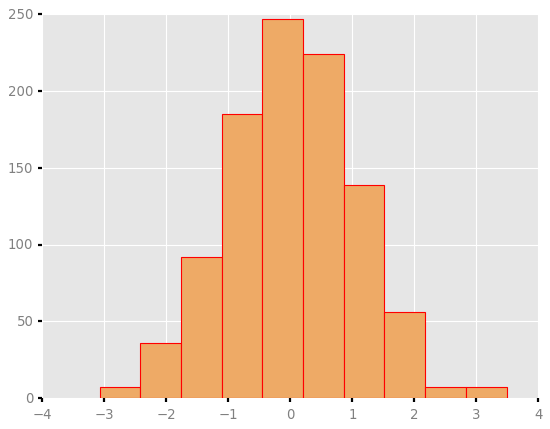

In [62]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')

# draw solid white grid lines
plt.grid(color='w', linestyle='solid', visible=True, lw=1)

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='k', direction='out',length=4, width=2)
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='r', color='#EEAA66');
plt.show()

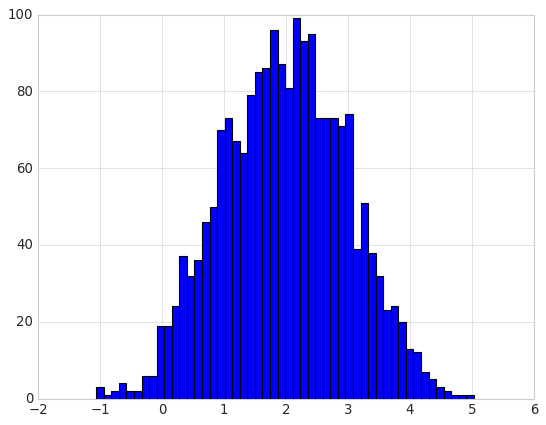

In [63]:
y = np.random.randn(2000)+2
plt.hist(y,bins=50)
plt.show()

In [64]:
colors = mpl.cycler('color',
                ['EEAA66b1', '3388BBb1', '9988DDb1',
                 'EECC55b1', '88BB44b1', 'FFBBBBb1'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')

plt.rc('xtick', direction='out', color='k')
plt.rc('ytick', direction='out', color='k')
plt.rc('xtick.major', size=2,width=4,top=False)
plt.rc('ytick.major', size=8,width=2,right=False)

plt.rc('patch', edgecolor='r')
plt.rc('lines', linewidth=1)

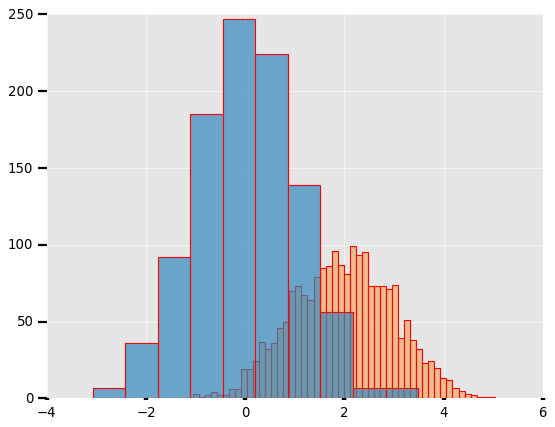

In [65]:
plt.hist(y,bins=50)
plt.hist(x)
plt.show()

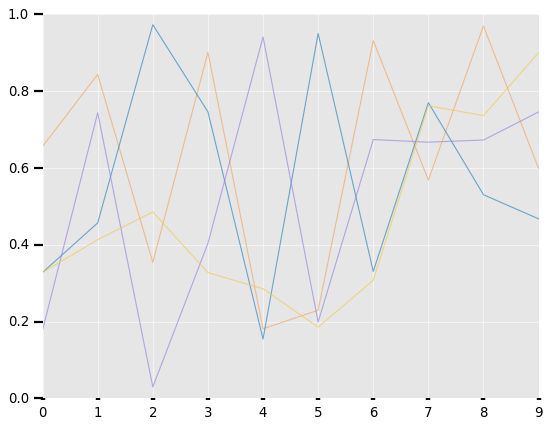

In [66]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [67]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [68]:
my_params = plt.rcParams.copy()
plt.rcParams.update(plt.rcParamsDefault)

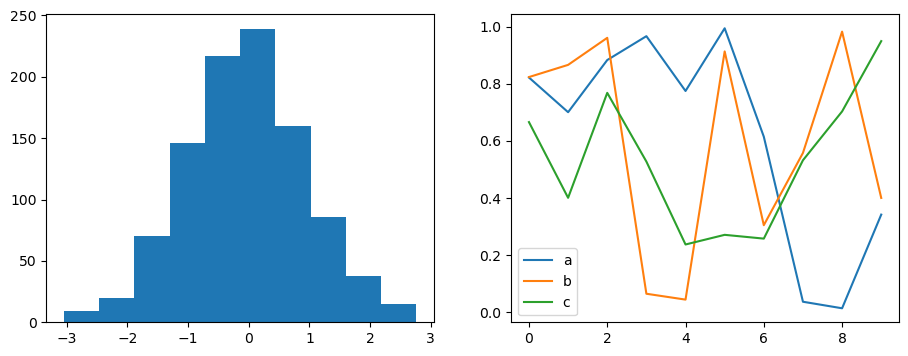

In [69]:
hist_and_lines()

In [70]:
plt.rcParams.update(my_params)

/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/srv/conda/envs/notebook/lib/python3.7/_collections_abc.py:841: MatplotlibDe

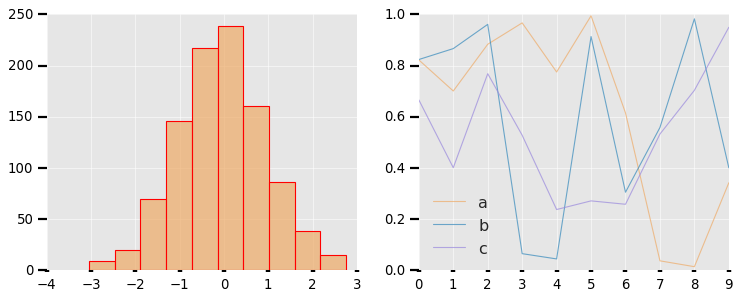

In [71]:
hist_and_lines()

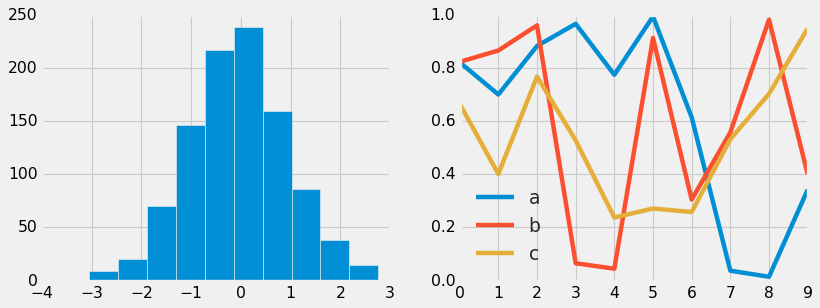

In [72]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

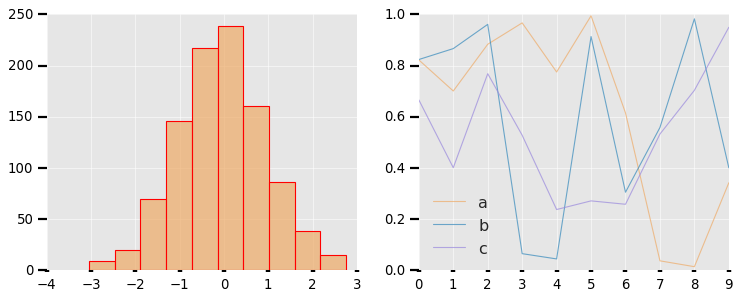

In [73]:
hist_and_lines()

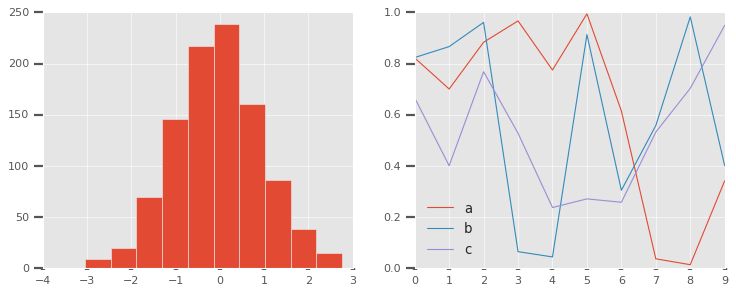

In [74]:
with plt.style.context('ggplot'):
    hist_and_lines()

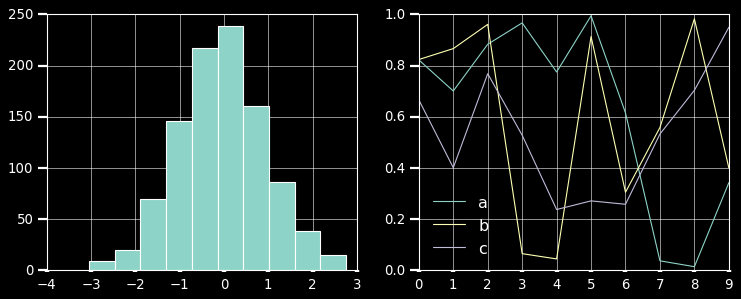

In [75]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Geographic Data with Basemap
One common type of visualization in data science is that of geographic data. Matplotlib's main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the mpl_toolkits namespace. Admittedly, Basemap feels a bit clunky to use, and often even simple visualizations take much longer to render than you might hope.

In [76]:
!conda install -y basemap
import os
os.environ["PROJ_LIB"]='/srv/conda/envs/notebook/lib/python3.7/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
plt.rcParams.update(plt.rcParamsDefault)

Solving environment: done

# All requested packages already installed.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


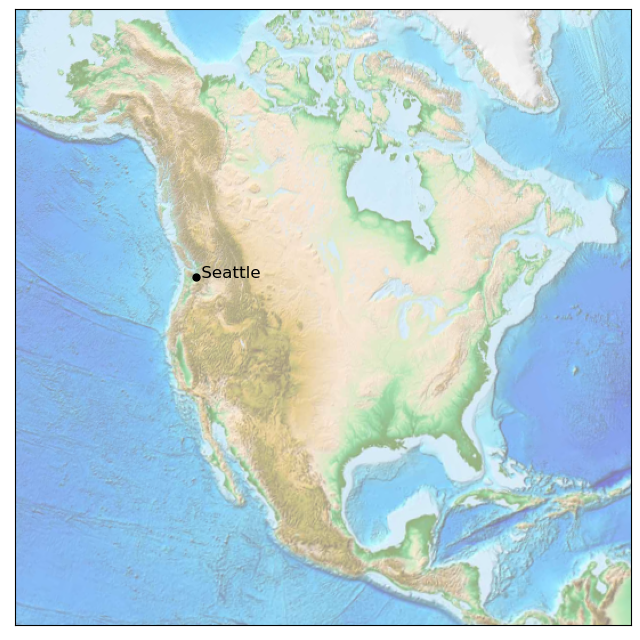

In [77]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [78]:
sorted_cities=cities.sort_values('area_total_km2',ascending=False).dropna()
to_plot = pd.concat([sorted_cities.head(10),sorted_cities.tail(10)])[['city','latd','longd']]
to_plot


city       latd       longd
239       LosAngeles  34.050000 -118.250000
367         SanDiego  32.715000 -117.162500
55    CaliforniaCity  35.125833 -117.985833
303         Palmdale  34.581111 -118.100556
359       Sacramento  38.555556 -121.468889
305      PalmSprings  33.823889 -116.530278
215        Lancaster  34.683333 -118.150000
149          Fremont  37.548333 -121.988611
351        Riverside  33.948056 -117.396111
449      Victorville  34.536111 -117.288333
376  SanJuanBautista  36.844167 -121.537222
435         Trinidad  41.059167 -124.143056
40             Biggs  39.413889 -121.710278
42          BlueLake  40.882778 -123.983889
144        FortJones  41.607222 -122.841944
195          Isleton  38.161944 -121.609167
109       DelReyOaks  36.593333 -121.835000
438         Tulelake  41.954167 -121.475833
242         Loyalton  39.676667 -120.243056
7         AmadorCity  38.419444 -120.824167

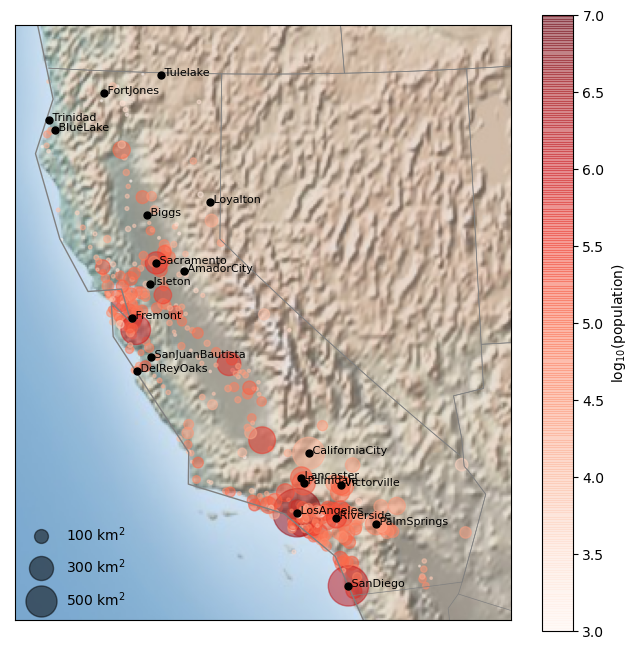

In [83]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# Map (long, lat) to (x, y) for plotting
for i,r in to_plot.iterrows():
    x, y = m(r['longd'],r['latd'])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, " "+r['city'], fontsize=8);
# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

### Visualization with Seaborn
Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code. Seaborn provides a convenience API on top of Matplotlib, and is well integrated with Pandas `Dataframe`s.

In [84]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

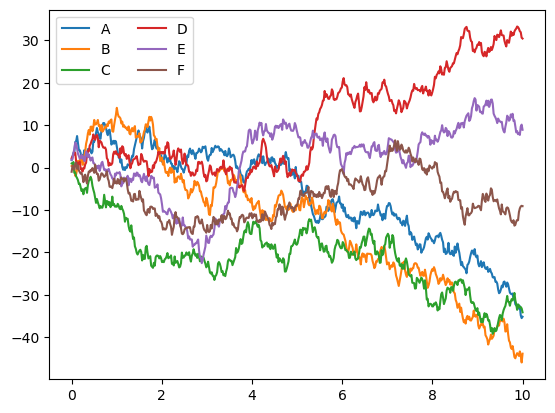

In [85]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

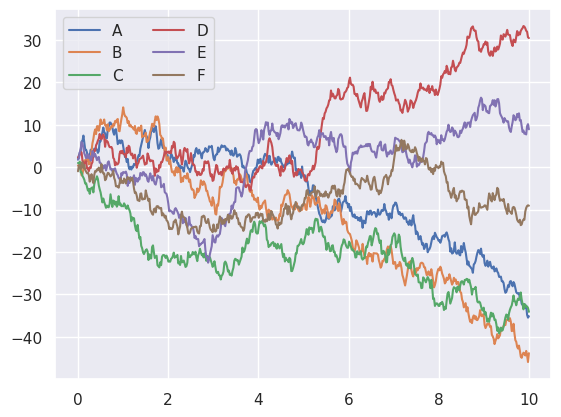

In [86]:
sns.set() # set rcparams for matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

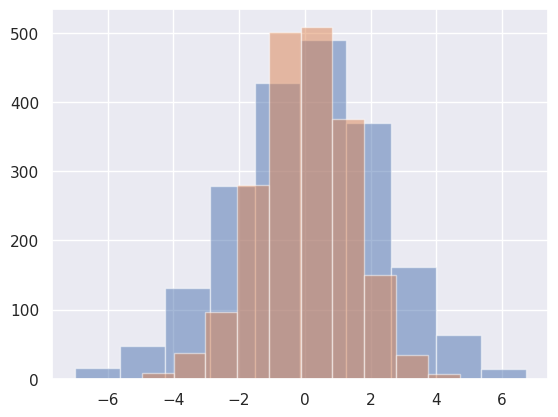

In [88]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col],  alpha=0.5)

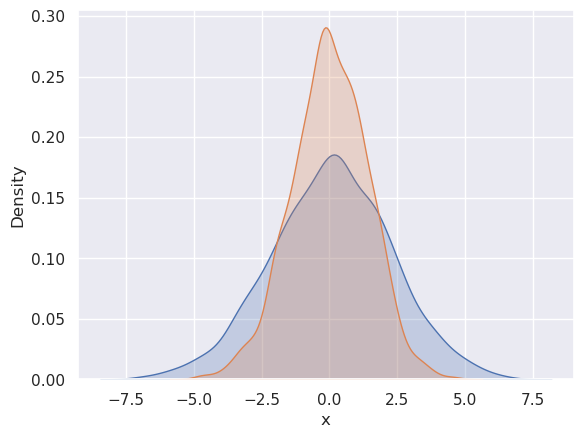

In [110]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True) #kernel density estimation

<AxesSubplot:xlabel='x', ylabel='Count'>

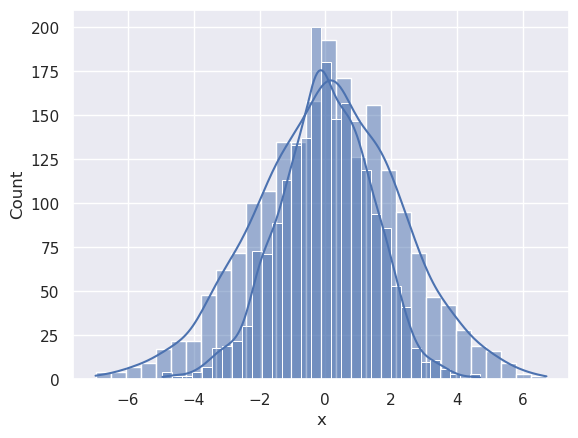

In [100]:
sns.histplot(data['x'],kde=True)
sns.histplot(data['y'],kde=True)

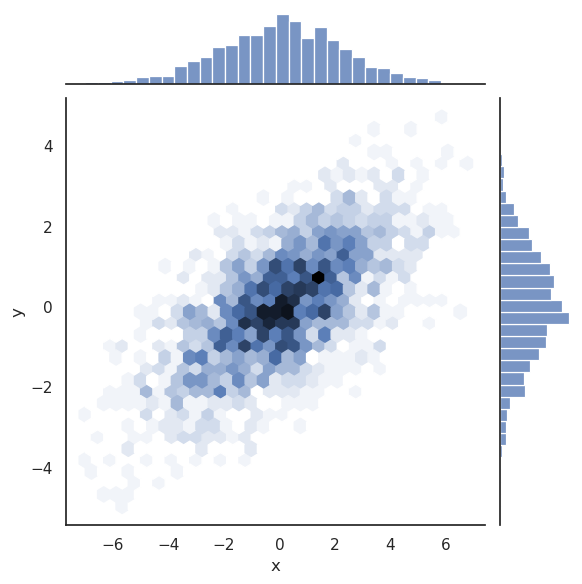

In [111]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y",data=data, kind='hex');

#### Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [112]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

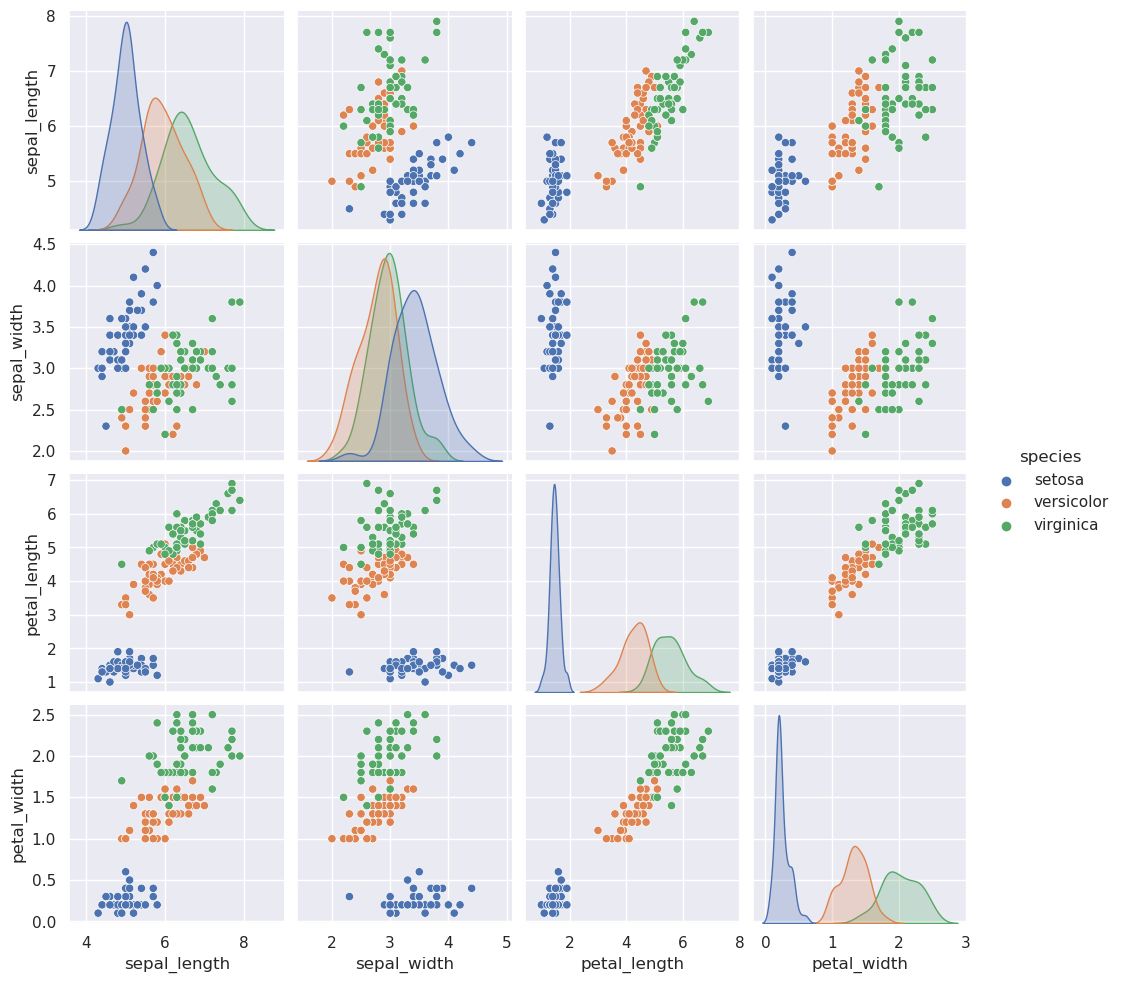

In [118]:
sns.pairplot(iris, hue='species')

In [119]:
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500   NaN   
2                   1       1  female  38.0      1      0  71.2833   C85   
3                   1       3  female  26.0      0      0   7.9250   NaN   
4                   1       1  female  35.0      1      0  53.1000  C123   
5                   0       3    male  35.0      0      0   8.0500   NaN   
6                   0       3    male   NaN      0      0   8.4583   NaN   
7                   0       1    male  54.0      0      0  51.8625   E46   
8                   0       3    male   2.0      3      1  21.0750   NaN   
9                   1       3  female  27.0      0      2  11.1333   NaN   
10                  1       2  female  14.0      1      0  30.0708   NaN   

            Embarked  
PassengerId           
1                  S  
2                  C  
3                  S  
4                  S  
5                  S  
6                  Q  
7                  S  
8                  S  
9                  S  
10                 C

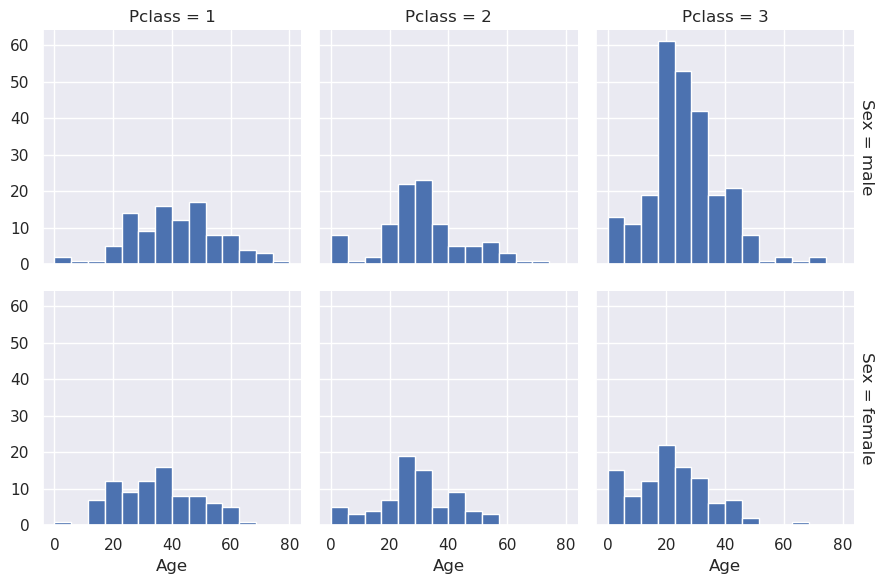

In [126]:
grid = sns.FacetGrid(titanic, row="Sex", col="Pclass", margin_titles=True)
grid.map(plt.hist, "Age", bins=np.linspace(0, 80, 15));

In [132]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

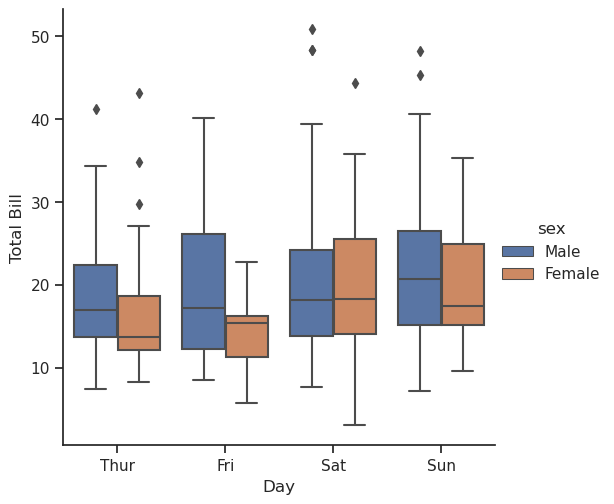

In [134]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box") #categorical plot
    g.set_axis_labels("Day", "Total Bill");